<a href="https://colab.research.google.com/github/Charly156/Actividad-3-Valores-Atipicos/blob/main/2_Actividad_Valores_Atipicos_Dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Actividad 3.2 (Valores Atípicos por DataFrame)**

In [1]:
#Se importan las bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##**Página del 2020**

In [2]:
#Se lee la base de datos
data = pd.read_excel('Gastos y costos 20-23.xlsx', sheet_name = '2020', skiprows = 5)
data.head()

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA,Columna1
0,2020-01-01,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,NaN,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,I,Vigente,NaN,14051.72
1,2020-01-01,0001010100750847116902,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,NaN,COMISION COBRADA,1.0,490.00,78.40,0.0,0.0,568.40,568.40,I,Vigente,NaN,0.00
2,2020-01-01,0001010100752163714102,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,NaN,COMISION COBRADA,1.0,195.00,31.20,0.0,0.0,226.20,226.20,I,Vigente,NaN,0.00
3,2020-01-01,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,NaN,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,I,Vigente,NaN,0.00
4,2020-01-01,2849,EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,NaN,Pago,1.0,0.00,NaN,0.0,0.0,0.00,0.00,P,Vigente,NaN,0.00


In [3]:
#Verificamos información del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3342 non-null   datetime64[ns]
 1   FOLIO        3153 non-null   object        
 2   UUID         3342 non-null   object        
 3   RFC          3342 non-null   object        
 4   PROVEEDOR    3342 non-null   object        
 5   TIPO GASTO   3342 non-null   object        
 6   GASTO        840 non-null    object        
 7   DESCRIPCION  3342 non-null   object        
 8   TC           2951 non-null   float64       
 9   IMPORTE      3308 non-null   float64       
 10  IVA          3074 non-null   float64       
 11  RET ISR      3342 non-null   float64       
 12  RET IVA      3342 non-null   float64       
 13  TOTAL MX     3342 non-null   float64       
 14  TOTAL SAT    3342 non-null   float64       
 15  TIPO         3341 non-null   object        
 16  STATUS

In [4]:
#Corroboramos valores nulos de la base de datos para poder analizar los datos
valores_nulos = data.isnull().sum()
valores_nulos

FECHA             0
FOLIO           189
UUID              0
RFC               0
PROVEEDOR         0
TIPO GASTO        0
GASTO          2502
DESCRIPCION       0
TC              391
IMPORTE          34
IVA             268
RET ISR           0
RET IVA           0
TOTAL MX          0
TOTAL SAT         0
TIPO              1
STATUS            0
POLIZA         3321
Columna1          0
dtype: int64

In [5]:
#Se crea una copia del archivo
df_2020 = data.copy()

#Luego sigue la limpieza de datos
df_2020['FOLIO'] = df_2020['FOLIO'].fillna('DESCONOCIDO')
df_2020['GASTO'] = df_2020['GASTO'].fillna('DESCONOCIDO')
df_2020['TC'] = df_2020['TC'].fillna(method = 'ffill')
df_2020['IMPORTE'] = df_2020['IMPORTE'].fillna(method = 'ffill')
df_2020['IVA'] = df_2020['IVA'].fillna(round(df_2020['IVA'].mean()))
df_2020['TIPO'] = df_2020['TIPO'].fillna('DESCONOCIDO')
df_2020['POLIZA'] = df_2020['POLIZA'].fillna('DESCONOCIDO')


In [6]:
#Se comprueba que todas las variables no tienen
#datos nulos
valores_nulos = df_2020.isnull().sum()
valores_nulos

FECHA          0
FOLIO          0
UUID           0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
GASTO          0
DESCRIPCION    0
TC             0
IMPORTE        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
TIPO           0
STATUS         0
POLIZA         0
Columna1       0
dtype: int64

In [7]:
#Se imprime la información del DataFrame del
#año
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3342 non-null   datetime64[ns]
 1   FOLIO        3342 non-null   object        
 2   UUID         3342 non-null   object        
 3   RFC          3342 non-null   object        
 4   PROVEEDOR    3342 non-null   object        
 5   TIPO GASTO   3342 non-null   object        
 6   GASTO        3342 non-null   object        
 7   DESCRIPCION  3342 non-null   object        
 8   TC           3342 non-null   float64       
 9   IMPORTE      3342 non-null   float64       
 10  IVA          3342 non-null   float64       
 11  RET ISR      3342 non-null   float64       
 12  RET IVA      3342 non-null   float64       
 13  TOTAL MX     3342 non-null   float64       
 14  TOTAL SAT    3342 non-null   float64       
 15  TIPO         3342 non-null   object        
 16  STATUS

In [8]:
#Se filtran los datos cuantitativos de los cualitativos
#en dos variables diferentes
dfnum_2020 = df_2020.iloc[:,[8,9,10,11,12,13,14]]
dfstr_2020 = df_2020.iloc[:,[0,1,2,3,4,5,6,7,15,16,17]]

<Figure size 1500x800 with 0 Axes>

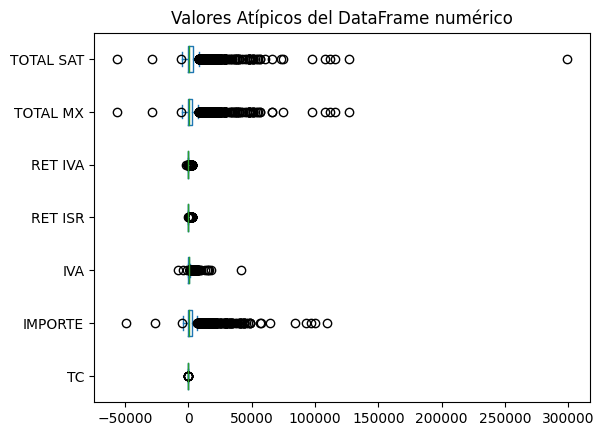

In [9]:
#Realizamos diagrama de caja o bigote de cada columna
#del dataframe numérico
fig = plt.figure(figsize = (15,8))
dfnum_2020.plot(kind = 'box', vert = False)
plt.title('Valores Atípicos del DataFrame numérico')
plt.show() #Se dibuja el diagrama

In [10]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y = dfnum_2020
Limite_superior = y.mean() + 3*y.std()
Limite_inferior = y.mean() - 3*y.std()
print('Límite superior permitido\n', Limite_superior)
print('\nLímite inferior permitido\n', Limite_inferior)

Límite superior permitido
 TC               4.239688
IMPORTE      25221.955114
IVA           4563.181678
RET ISR        667.271992
RET IVA        958.239955
TOTAL MX     28488.002843
TOTAL SAT    33250.398514
dtype: float64

Límite inferior permitido
 TC              -2.129870
IMPORTE     -18916.896730
IVA          -3523.503976
RET ISR       -627.750813
RET IVA       -839.215179
TOTAL MX    -21455.655297
TOTAL SAT   -25762.462834
dtype: float64


In [11]:
##IMPORTANTE##
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
df2_2020 = dfnum_2020[(y <= Limite_superior) & (y >= Limite_inferior)]
df2_2020

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20
3,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33
4,1.0,0.00,520.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [12]:
#Corroboramos valores nulos de la base de
#datos para poder analizar los datos
valores_nulos = df2_2020.isnull().sum()
valores_nulos

TC            9
IMPORTE      66
IVA          58
RET ISR      21
RET IVA      74
TOTAL MX     65
TOTAL SAT    45
dtype: int64

In [13]:
#Se reemplazan los valores atípicos (nulos) del DataFrame con 'mean'
#Realizamos una copia del DataFrame
df2_2020_clean = df2_2020.copy()
df2_2020_clean = df2_2020_clean.fillna(round(df2_2020.mean()))

In [14]:
valores_nulos = df2_2020_clean.isnull().sum()
valores_nulos

TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

In [15]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y = df2_2020

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_superior_iqr = percentile75 + 1.5 * iqr
Limite_inferior_iqr = percentile25 - 1.5 * iqr
print('Límite superior permitido\n', Limite_superior_iqr)
print('\nLímite inferior permitido\n', Limite_inferior_iqr)

Límite superior permitido
 TC              1.00000
IMPORTE      6446.97500
IVA          1282.88875
RET ISR         0.00000
RET IVA         0.00000
TOTAL MX     7249.98500
TOTAL SAT    7864.21000
dtype: float64

Límite inferior permitido
 TC              1.00000
IMPORTE     -3851.62500
IVA          -751.48125
RET ISR         0.00000
RET IVA         0.00000
TOTAL MX    -4349.97500
TOTAL SAT   -4600.35000
dtype: float64


In [16]:
#Obtenermos datos limpios del DataFrame
df2_2020_iqr= df2_2020[(y <= Limite_superior) & (y >= Limite_inferior)]
df2_2020_iqr

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20
3,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33
4,1.0,0.00,520.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [17]:
valores_nulos = df2_2020_iqr.isnull().sum()
valores_nulos

TC            9
IMPORTE      66
IVA          58
RET ISR      21
RET IVA      74
TOTAL MX     65
TOTAL SAT    45
dtype: int64

In [18]:
#Se reemplazan los valores atípicos (nulos) del DataFrame con 'mean'
#Realizamos una copia del DataFrame
df2_2020_iqr_clean = df2_2020.copy()
df2_2020_iqr_clean = df2_2020_iqr_clean.fillna(round(df2_2020_iqr.mean()))

In [19]:
valores_nulos = df2_2020_iqr_clean.isnull().sum()
valores_nulos

TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

In [20]:
Datos_limpios_2020 = pd.concat([dfstr_2020,df2_2020_iqr_clean], axis = 1)
Datos_limpios_2020

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TIPO,STATUS,POLIZA,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2020-01-01,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,DESCONOCIDO,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",I,Vigente,DESCONOCIDO,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00
1,2020-01-01,0001010100750847116902,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,DESCONOCIDO,COMISION COBRADA,I,Vigente,DESCONOCIDO,1.0,490.00,78.40,0.0,0.0,568.40,568.40
2,2020-01-01,0001010100752163714102,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,DESCONOCIDO,COMISION COBRADA,I,Vigente,DESCONOCIDO,1.0,195.00,31.20,0.0,0.0,226.20,226.20
3,2020-01-01,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,DESCONOCIDO,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,I,Vigente,DESCONOCIDO,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33
4,2020-01-01,2849,EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,DESCONOCIDO,Pago,P,Vigente,DESCONOCIDO,1.0,0.00,520.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,2020-12-01,125834,80BCB1D8-673F-495B-9C2A-4AC9F9CB38E5,SQS110113MU0,SERVICIO QUINTANA SUR S.A DE C.V,COMBUSTIBLE,G VTA,32011 MAGNA,I,Vigente,DESCONOCIDO,1.0,129.79,20.21,0.0,0.0,150.00,150.00
3338,2020-12-01,37652,D4C7C1FB-03A7-4046-A2BD-03EBE7DA861E,PSQ790724C90,"CIA. PERIODISTICA DEL SOL DE QUERETARO, S.A. D...",PUBLICIDAD,G VTA,82101504-PUBLICIDAD EN PERIODICOSCALOR Y CONTROL,I,Vigente,DESCONOCIDO,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37
3339,2020-12-01,160,FFCEE7D4-1F38-4D44-BE02-EB042DAACEE7,SQX981027RY5,"SUPER Q, S. A. DE C. V.",ALIMENTOS,G VTA,REF VICTORIA GROSELLA 3 LT PET NR,I,Vigente,DESCONOCIDO,1.0,163.79,26.21,0.0,0.0,190.00,190.00
3340,2020-12-01,634875,8DFF4F01-2F8B-4085-B116-05A314108B02,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,G FINA,COMISIONES E INTERESES,I,Vigente,DESCONOCIDO,1.0,0.00,0.00,0.0,0.0,0.00,0.00


##**Página del 2021**

In [21]:
#Se lee la base de datos
data2 = pd.read_excel('Gastos y costos 20-23.xlsx', sheet_name = '2021', skiprows = 3)
data2.head()

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA
0,2021-01-01,0001010100750847116902,71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,1.0,490.00,78.40,0.0,0.0,568.4,568.4,I,Vigente,0
1,2021-01-01,0001010100752163714102,B8AEDE83-CC76-404C-A611-6B5A87BA561F,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,1.0,345.00,55.20,0.0,0.0,400.2,400.2,I,Vigente,0
2,2021-01-01,19788,19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,PUE,1.0,3447.41,551.59,0.0,0.0,3999.0,3999.0,I,Vigente,0
3,2021-01-01,211781,EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,PPD,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6,I,Vigente,0
4,2021-01-01,211782,C16F79B5-FB35-4BFC-AF84-708B24F500BB,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,PPD,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3,I,Vigente,0


In [22]:
#Verificamos información del DataFrame
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3035 non-null   datetime64[ns]
 1   FOLIO        2888 non-null   object        
 2   UUID         3035 non-null   object        
 3   RFC          3035 non-null   object        
 4   PROVEEDOR    3035 non-null   object        
 5   TIPO GASTO   3035 non-null   object        
 6   DESCRIPCION  3035 non-null   object        
 7   MP           2381 non-null   object        
 8   TC           3035 non-null   float64       
 9   IMPORTE      3035 non-null   float64       
 10  IVA          3035 non-null   float64       
 11  RET ISR      3035 non-null   float64       
 12  RET IVA      3035 non-null   float64       
 13  TOTAL MX     3035 non-null   float64       
 14  TOTAL SAT    3035 non-null   float64       
 15  TIPO         3035 non-null   object        
 16  STATUS

In [23]:
#Corroboramos valores nulos de la base de datos para poder analizar los datos
valores_nulos = data2.isnull().sum()
valores_nulos

FECHA             0
FOLIO           147
UUID              0
RFC               0
PROVEEDOR         0
TIPO GASTO        0
DESCRIPCION       0
MP              654
TC                0
IMPORTE           0
IVA               0
RET ISR           0
RET IVA           0
TOTAL MX          0
TOTAL SAT         0
TIPO              0
STATUS            0
POLIZA         2372
dtype: int64

In [24]:
#Se crea una copia del archivo
df_2021 = data2.copy()

#Luego sigue la limpieza de datos
df_2021['FOLIO'] = df_2021['FOLIO'].fillna('DESCONOCIDO')
df_2021['MP'] = df_2021['MP'].fillna('DESCONOCIDO')
df_2021['POLIZA'] = df_2021['POLIZA'].fillna('DESCONOCIDO')

In [25]:
#Se comprueba que ya no hay más datos nulos
valores_nulos = df_2021.isnull().sum()
valores_nulos

FECHA          0
FOLIO          0
UUID           0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
DESCRIPCION    0
MP             0
TC             0
IMPORTE        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
TIPO           0
STATUS         0
POLIZA         0
dtype: int64

In [26]:
#Se imprime la información del DataFrame del
#año
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3035 non-null   datetime64[ns]
 1   FOLIO        3035 non-null   object        
 2   UUID         3035 non-null   object        
 3   RFC          3035 non-null   object        
 4   PROVEEDOR    3035 non-null   object        
 5   TIPO GASTO   3035 non-null   object        
 6   DESCRIPCION  3035 non-null   object        
 7   MP           3035 non-null   object        
 8   TC           3035 non-null   float64       
 9   IMPORTE      3035 non-null   float64       
 10  IVA          3035 non-null   float64       
 11  RET ISR      3035 non-null   float64       
 12  RET IVA      3035 non-null   float64       
 13  TOTAL MX     3035 non-null   float64       
 14  TOTAL SAT    3035 non-null   float64       
 15  TIPO         3035 non-null   object        
 16  STATUS

In [27]:
#Se filtran los datos cuantitativos de los cualitativos
#en dos variables diferentes
dfnum_2021 = df_2021.iloc[:,[8,9,10,11,12,13,14]]
dfstr_2021 = df_2021.iloc[:,[0,1,2,3,4,5,6,7,15,16,17]]

<Figure size 1500x800 with 0 Axes>

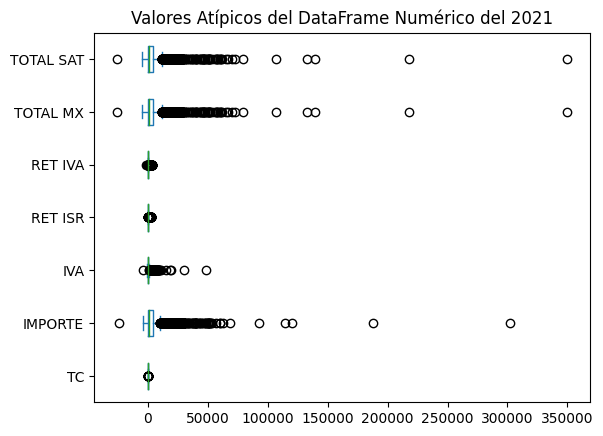

In [28]:
#Realizamos diagrama de caja o bigote de cada columna
#del dataframe numérico
fig = plt.figure(figsize = (15,8))
dfnum_2021.plot(kind = 'box', vert = False)
plt.title('Valores Atípicos del DataFrame Numérico del 2021')
plt.show() #Se dibuja el diagrama

In [29]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y = dfnum_2021
Limite_superior = y.mean() + 3*y.std()
Limite_inferior = y.mean() - 3*y.std()
print('Límite superior permitido\n', Limite_superior)
print('\nLímite inferior permitido\n', Limite_inferior)

Límite superior permitido
 TC               6.286851
IMPORTE      36154.569820
IVA           5464.876801
RET ISR        900.150092
RET IVA       1200.884906
TOTAL MX     40680.462408
TOTAL SAT    40671.985064
dtype: float64

Límite inferior permitido
 TC              -3.981398
IMPORTE     -27625.812771
IVA          -4276.811367
RET ISR       -833.428945
RET IVA      -1053.848939
TOTAL MX    -31176.694132
TOTAL SAT   -31129.503410
dtype: float64


In [30]:
##IMPORTANTE##
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
df2_2021 = dfnum_2021[(y <= Limite_superior) & (y >= Limite_inferior)]
df2_2021

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.40,568.40
1,1.0,345.00,55.20,0.0,0.0,400.20,400.20
2,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00
3,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
4,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
...,...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3031,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3032,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04
3033,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [31]:
#Corroboramos valores nulos de la base de
#datos para poder analizar los datos
valores_nulos = df2_2021.isnull().sum()
valores_nulos

TC           24
IMPORTE      43
IVA          38
RET ISR      32
RET IVA      81
TOTAL MX     40
TOTAL SAT    40
dtype: int64

In [32]:
#Se reemplazan los valores atípicos (nulos) del DataFrame con 'mean'
#Realizamos una copia del DataFrame
df2_2021_clean = df2_2021.copy()
df2_2021_clean = df2_2021_clean.fillna(round(df2_2021.mean()))

In [33]:
valores_nulos = df2_2021_clean.isnull().sum()
valores_nulos

TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

In [34]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y = df2_2021

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_superior_iqr = percentile75 + 1.5 * iqr
Limite_inferior_iqr = percentile25 - 1.5 * iqr
print('Límite superior permitido\n', Limite_superior_iqr)
print('\nLímite inferior permitido\n', Limite_inferior_iqr)

Límite superior permitido
 TC               1.000
IMPORTE       9642.525
IVA           1290.750
RET ISR          0.000
RET IVA          0.000
TOTAL MX     10985.200
TOTAL SAT    10842.000
dtype: float64

Límite inferior permitido
 TC              1.000
IMPORTE     -5785.515
IVA          -774.450
RET ISR         0.000
RET IVA         0.000
TOTAL MX    -6591.120
TOTAL SAT   -6470.000
dtype: float64


In [35]:
#Obtenermos datos limpios del DataFrame
df2_2021_iqr= df2_2021[(y <= Limite_superior) & (y >= Limite_inferior)]
df2_2021_iqr

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.40,568.40
1,1.0,345.00,55.20,0.0,0.0,400.20,400.20
2,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00
3,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
4,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
...,...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3031,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3032,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04
3033,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [36]:
#Corroboramos valores nulos de la base de
#datos para poder analizar los datos
valores_nulos = df2_2021_iqr.isnull().sum()
valores_nulos

TC           24
IMPORTE      43
IVA          38
RET ISR      32
RET IVA      81
TOTAL MX     40
TOTAL SAT    40
dtype: int64

In [37]:
#Se reemplazan los valores atípicos (nulos) del DataFrame con 'mean'
#Realizamos una copia del DataFrame
df2_2021_iqr_clean = df2_2021.copy()
df2_2021_iqr_clean = df2_2021_iqr_clean.fillna(round(df2_2021.mean()))

In [38]:
valores_nulos = df2_2021_iqr_clean.isnull().sum()
valores_nulos

TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

In [39]:
Datos_limpios_2021 = pd.concat([dfstr_2021,df2_2021_iqr_clean], axis = 1)
Datos_limpios_2021

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TIPO,STATUS,POLIZA,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2021-01-01,0001010100750847116902,71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,0,1.0,490.00,78.40,0.0,0.0,568.40,568.40
1,2021-01-01,0001010100752163714102,B8AEDE83-CC76-404C-A611-6B5A87BA561F,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,0,1.0,345.00,55.20,0.0,0.0,400.20,400.20
2,2021-01-01,19788,19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,PUE,I,Vigente,0,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00
3,2021-01-01,211781,EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,PPD,I,Vigente,0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
4,2021-01-01,211782,C16F79B5-FB35-4BFC-AF84-708B24F500BB,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,PPD,I,Vigente,0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,2021-12-01,127043,83F82167-0D14-144E-9D76-045C95F25DDD,PGM881128QIA,"PROMOCIONES GRAFICAS MEXICANAS, S.A. DE C.V.",PUBLICIDAD,Pago,DESCONOCIDO,P,Vigente,DESCONOCIDO,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3031,2021-12-01,11740,B1C60AE0-02BC-4A33-9513-A280F72B5D06,SME0510105C7,SPECTRIS MEXICO S DE RL DE CV,COMPRAS,INSULATED T/C WIRE,PUE,I,Vigente,DESCONOCIDO,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3032,2021-12-01,1092957089,255F4A25-5753-4208-8F6B-0B59E5AE4741,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,I,Vigente,DESCONOCIDO,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04
3033,2021-12-01,747826,D8226E4F-9241-44C3-86A4-CDE9BC932528,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,I,Vigente,DESCONOCIDO,1.0,0.00,0.00,0.0,0.0,0.00,0.00


##**Página del 2022**

In [40]:
#Se lee la base de datos
data3 = pd.read_excel('Gastos y costos 20-23.xlsx', sheet_name = '2022', skiprows = 3)
data3.head()

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,1.0,5551.38,888.22,0.0,0.0,NaN,6439.6,6439.6,I,Vigente,PE02-ENE22
1,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,1.0,5551.98,888.32,0.0,0.0,NaN,6440.3,6440.3,I,Vigente,PE03-ENE22
2,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0,I,Vigente,NaN
3,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0,P,Vigente,NaN
4,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0,P,Vigente,NaN


In [41]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        2577 non-null   datetime64[ns]
 1   Folio        2475 non-null   object        
 2   UUID         2577 non-null   object        
 3   RFC          2577 non-null   object        
 4   Proveedor    2577 non-null   object        
 5   TIPO GASTO   2577 non-null   object        
 6   Descripción  2577 non-null   object        
 7   MP           2024 non-null   object        
 8   TC           1941 non-null   float64       
 9   Importe      2577 non-null   float64       
 10  IVA          2577 non-null   float64       
 11  RET ISR      2577 non-null   float64       
 12  RET IVA      2577 non-null   float64       
 13  Otros        0 non-null      float64       
 14  TOTAL MX     2577 non-null   float64       
 15  TOTAL SAT    2577 non-null   float64       
 16  Tipo  

In [42]:
#Corroboramos valores nulos de la base de datos para poder analizar los datos
valores_nulos = data3.isnull().sum()
valores_nulos

Fecha             0
Folio           102
UUID              0
RFC               0
Proveedor         0
TIPO GASTO        0
Descripción       0
MP              553
TC              636
Importe           0
IVA               0
RET ISR           0
RET IVA           0
Otros          2577
TOTAL MX          0
TOTAL SAT         0
Tipo              0
Status            0
Poliza          801
dtype: int64

In [43]:
#Se crea una copia del archivo
df_2022 = data3.copy()

#Luego sigue la limpieza de datos
df_2022['Folio'] = df_2022['Folio'].fillna('DESCONOCIDO')
df_2022['MP'] = df_2022['MP'].fillna('DESCONOCIDO')
df_2022['TC'] = df_2022['TC'].fillna(method = 'ffill')
df_2022['Poliza'] = df_2022['Poliza'].fillna('DESCONOCIDO')

In [44]:
valores_nulos = df_2022.isnull().sum()
valores_nulos

Fecha             0
Folio             0
UUID              0
RFC               0
Proveedor         0
TIPO GASTO        0
Descripción       0
MP                0
TC                0
Importe           0
IVA               0
RET ISR           0
RET IVA           0
Otros          2577
TOTAL MX          0
TOTAL SAT         0
Tipo              0
Status            0
Poliza            0
dtype: int64

In [45]:
#Se filtran los datos cuantitativos de los cualitativos
#en dos variables diferentes
dfnum_2022 = df_2022.iloc[:,[8,9,10,11,12,14,15]]
dfstr_2022 = df_2022.iloc[:,[0,1,2,3,4,5,6,7,16,17,18]]

<Figure size 1500x800 with 0 Axes>

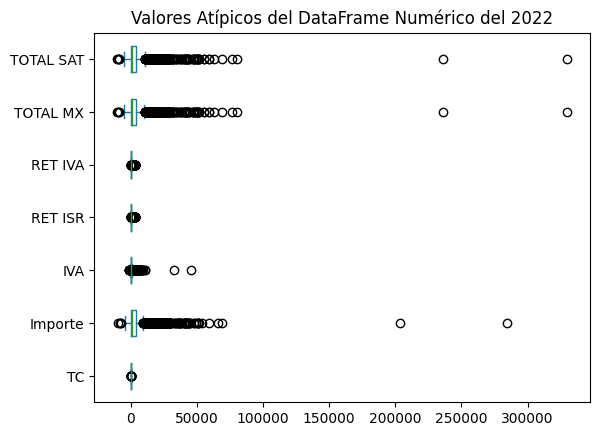

In [46]:
#Realizamos diagrama de caja o bigote de cada columna
#del dataframe numérico
fig = plt.figure(figsize = (15,8))
dfnum_2022.plot(kind = 'box', vert = False)
plt.title('Valores Atípicos del DataFrame Numérico del 2022')
plt.show() #Se dibuja el diagrama

In [47]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y = dfnum_2022
Limite_superior = y.mean() + 3*y.std()
Limite_inferior = y.mean() - 3*y.std()
print('Límite superior permitido\n', Limite_superior)
print('\nLímite inferior permitido\n', Limite_inferior)

Límite superior permitido
 TC               7.304331
Importe      34975.501132
IVA           5048.646001
RET ISR        977.619941
RET IVA       1046.847384
TOTAL MX     39054.094273
TOTAL SAT    39095.543969
dtype: float64

Límite inferior permitido
 TC              -4.864379
Importe     -26990.441616
IVA          -4069.819702
RET ISR       -902.558225
RET IVA       -964.592475
TOTAL MX    -30247.525081
TOTAL SAT   -30172.959879
dtype: float64


In [48]:
##IMPORTANTE##
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
df2_2022 = dfnum_2022[(y <= Limite_superior) & (y >= Limite_inferior)]
df2_2022

,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
1,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
2,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3,1.0,0.00,0.00,0.0,0.0,0.00,0.00
4,1.0,0.00,0.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...
2572,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2573,1.0,17310.30,516.32,0.0,0.0,17826.62,17826.62
2574,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2575,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [49]:
#Corroboramos valores nulos de la base de
#datos para poder analizar los datos
valores_nulos = df2_2022.isnull().sum()
valores_nulos

TC           30
Importe      36
IVA          31
RET ISR      32
RET IVA      32
TOTAL MX     36
TOTAL SAT    36
dtype: int64

In [50]:
#Se reemplazan los valores atípicos (nulos) del DataFrame con 'mean'
#Realizamos una copia del DataFrame
df2_2022_clean = df2_2022.copy()
df2_2022_clean = df2_2022_clean.fillna(round(df2_2022.mean()))

In [51]:
valores_nulos = df2_2022_clean.isnull().sum()
valores_nulos

TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

In [52]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y = df2_2022

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_superior_iqr = percentile75 + 1.5 * iqr
Limite_inferior_iqr = percentile25 - 1.5 * iqr
print('Límite superior permitido\n', Limite_superior_iqr)
print('\nLímite inferior permitido\n', Limite_inferior_iqr)

Límite superior permitido
 TC              1.0
Importe      8375.0
IVA          1000.0
RET ISR         0.0
RET IVA         0.0
TOTAL MX     9609.3
TOTAL SAT    9715.0
dtype: float64

Límite inferior permitido
 TC              1.00
Importe     -5025.00
IVA          -600.00
RET ISR         0.00
RET IVA         0.00
TOTAL MX    -5765.58
TOTAL SAT   -5829.00
dtype: float64


In [53]:
#Obtenermos datos limpios del DataFrame
df2_2022_iqr= df2_2022[(y <= Limite_superior) & (y >= Limite_inferior)]
df2_2022_iqr

,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
1,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
2,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3,1.0,0.00,0.00,0.0,0.0,0.00,0.00
4,1.0,0.00,0.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...
2572,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2573,1.0,17310.30,516.32,0.0,0.0,17826.62,17826.62
2574,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2575,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [54]:
#Corroboramos valores nulos de la base de
#datos para poder analizar los datos
valores_nulos = df2_2022_iqr.isnull().sum()
valores_nulos

TC           30
Importe      36
IVA          31
RET ISR      32
RET IVA      32
TOTAL MX     36
TOTAL SAT    36
dtype: int64

In [55]:
#Se reemplazan los valores atípicos (nulos) del DataFrame con 'mean'
#Realizamos una copia del DataFrame
df2_2022_iqr_clean = df2_2022.copy()
df2_2022_iqr_clean = df2_2022_iqr_clean.fillna(round(df2_2022.mean()))

In [56]:
valores_nulos = df2_2022_iqr_clean.isnull().sum()
valores_nulos

TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

In [57]:
Datos_limpios_2022 = pd.concat([dfstr_2022,df2_2022_iqr_clean], axis = 1)
Datos_limpios_2022

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,Tipo,Status,Poliza,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,I,Vigente,PE02-ENE22,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
1,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,I,Vigente,PE03-ENE22,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
2,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,I,Vigente,DESCONOCIDO,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,DESCONOCIDO,P,Vigente,DESCONOCIDO,1.0,0.00,0.00,0.0,0.0,0.00,0.00
4,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,DESCONOCIDO,P,Vigente,DESCONOCIDO,1.0,0.00,0.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,2022-12-01,863376,E90DA089-3C3B-45C8-A19C-B8810D222F60,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,I,Vigente,DESCONOCIDO,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2573,2022-12-01,1092957089,D720ED7C-F370-4236-B269-8873ABB78745,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,I,Vigente,DESCONOCIDO,1.0,17310.30,516.32,0.0,0.0,17826.62,17826.62
2574,2022-12-01,4,0AFD3EB5-F3DD-43EB-B9FA-79D793CFF417,AAE6411055P8,Aesa Articulos Electricos S.A de C.V,COMPRAS,Pago,DESCONOCIDO,P,Vigente,DESCONOCIDO,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2575,2022-12-01,16,E3CA1DA8-581A-5844-80D2-CF0317B3BBEA,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,DESCONOCIDO,P,Vigente,DESCONOCIDO,1.0,0.00,0.00,0.0,0.0,0.00,0.00


##**Página del 2023**

In [58]:
#Se lee la base de datos
data4 = pd.read_excel('Gastos y costos 20-23.xlsx', sheet_name = '2023', skiprows = 3)
data4.head()

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,NaN
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,NaN
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,99.0,1.0,5551.38,888.22,0.0,0.0,NaN,6439.60,6439.60,I,Vigente,PE01-ENE23
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,99.0,1.0,5551.98,888.32,0.0,0.0,NaN,6440.30,6440.30,I,Vigente,PE02-ENE23
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,99.0,1.0,8454.37,1352.70,0.0,0.0,NaN,9807.07,9807.07,I,Vigente,PE03-ENE23


In [59]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        397 non-null    datetime64[ns]
 1   Folio        384 non-null    object        
 2   UUID         397 non-null    object        
 3   RFC          397 non-null    object        
 4   Proveedor    397 non-null    object        
 5   TIPO GASTO   389 non-null    object        
 6   Descripción  397 non-null    object        
 7   MP           326 non-null    object        
 8   FP           326 non-null    float64       
 9   TC           397 non-null    float64       
 10  Importe      397 non-null    float64       
 11  IVA          397 non-null    float64       
 12  RET ISR      397 non-null    float64       
 13  RET IVA      397 non-null    float64       
 14  Otros        0 non-null      float64       
 15  TOTAL MX     397 non-null    float64       
 16  TOTAL SA

In [60]:
#Corroboramos valores nulos de la base de datos para poder analizar los datos
valores_nulos = data4.isnull().sum()
valores_nulos

Fecha            0
Folio           13
UUID             0
RFC              0
Proveedor        0
TIPO GASTO       8
Descripción      0
MP              71
FP              71
TC               0
Importe          0
IVA              0
RET ISR          0
RET IVA          0
Otros          397
TOTAL MX         0
TOTAL SAT        0
Tipo             0
Status           0
Poliza         115
dtype: int64

In [61]:
#Se crea una copia del archivo
df_2023 = data4.copy()

#Luego sigue la limpieza de datos
df_2023['Folio'] = df_2023['Folio'].fillna('DESCONOCIDO')
df_2023['TIPO GASTO'] = df_2023['TIPO GASTO'].fillna('DESCONOCIDO')
df_2023['MP'] = df_2023['MP'].fillna('DESCONOCIDO')
df_2023['FP'] = df_2023['FP'].fillna(method = 'ffill')
df_2023['Poliza'] = df_2023['Poliza'].fillna('DESCONOCIDO')

In [62]:
valores_nulos = df_2023.isnull().sum()
valores_nulos

Fecha            0
Folio            0
UUID             0
RFC              0
Proveedor        0
TIPO GASTO       0
Descripción      0
MP               0
FP               2
TC               0
Importe          0
IVA              0
RET ISR          0
RET IVA          0
Otros          397
TOTAL MX         0
TOTAL SAT        0
Tipo             0
Status           0
Poliza           0
dtype: int64

In [63]:
#Se filtran los datos cuantitativos de los cualitativos
#en dos variables diferentes
dfnum_2023 = df_2023.iloc[:,[8,9,10,11,12,15,16]]
dfstr_2023 = df_2023.iloc[:,[0,1,2,3,4,5,6,7,17,18,19]]

<Figure size 1500x800 with 0 Axes>

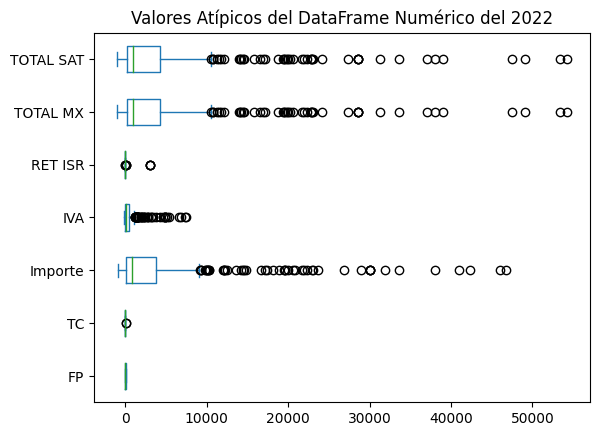

In [64]:
#Realizamos diagrama de caja o bigote de cada columna
#del dataframe numérico
fig = plt.figure(figsize = (15,8))
dfnum_2023.plot(kind = 'box', vert = False)
plt.title('Valores Atípicos del DataFrame Numérico del 2022')
plt.show() #Se dibuja el diagrama

In [65]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y = dfnum_2023
Limite_superior = y.mean() + 3*y.std()
Limite_inferior = y.mean() - 3*y.std()
print('Límite superior permitido\n', Limite_superior)
print('\nLímite inferior permitido\n', Limite_inferior)

Límite superior permitido
 FP             187.717770
TC               4.957143
Importe      26557.244156
IVA           3761.774707
RET ISR        931.175004
TOTAL MX     29218.464899
TOTAL SAT    29218.464899
dtype: float64

Límite inferior permitido
 FP             -98.588656
TC              -2.774030
Importe     -18708.366775
IVA          -2766.954304
RET ISR       -869.142712
TOTAL MX    -20512.146863
TOTAL SAT   -20512.146863
dtype: float64


In [66]:
##IMPORTANTE##
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
df2_2023 = dfnum_2023[(y <= Limite_superior) & (y >= Limite_inferior)]
df2_2023

,FP,TC,Importe,IVA,RET ISR,TOTAL MX,TOTAL SAT
0,NaN,1.0,0.00,0.00,0.0,0.00,0.00
1,NaN,1.0,0.00,0.00,0.0,0.00,0.00
2,99.0,1.0,5551.38,888.22,0.0,6439.60,6439.60
3,99.0,1.0,5551.98,888.32,0.0,6440.30,6440.30
4,99.0,1.0,8454.37,1352.70,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.00,0.00
393,1.0,1.0,220.00,0.00,0.0,220.00,220.00
394,3.0,1.0,18071.52,682.40,0.0,18753.92,18753.92
395,5.0,1.0,14472.32,0.00,0.0,14472.32,14472.32


In [67]:
#Corroboramos valores nulos de la base de
#datos para poder analizar los datos
valores_nulos = df2_2023.isnull().sum()
valores_nulos

FP            2
TC            2
Importe      13
IVA          13
RET ISR       4
TOTAL MX      9
TOTAL SAT     9
dtype: int64

In [68]:
#Se reemplazan los valores atípicos (nulos) del DataFrame con 'mean'
#Realizamos una copia del DataFrame
df2_2023_clean = df2_2023.copy()
df2_2023_clean = df2_2023_clean.fillna(round(df2_2023.mean()))

In [69]:
valores_nulos = df2_2023_clean.isnull().sum()
valores_nulos

FP           0
TC           0
Importe      0
IVA          0
RET ISR      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

In [70]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y = df2_2023

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_superior_iqr = percentile75 + 1.5 * iqr
Limite_inferior_iqr = percentile25 - 1.5 * iqr
print('Límite superior permitido\n', Limite_superior_iqr)
print('\nLímite inferior permitido\n', Limite_inferior_iqr)

Límite superior permitido
 FP            243.00000
TC              1.00000
Importe      7190.16750
IVA           919.85625
RET ISR         0.00000
TOTAL MX     8503.49625
TOTAL SAT    8503.49625
dtype: float64

Límite inferior permitido
 FP           -141.00000
TC              1.00000
Importe     -4159.61250
IVA          -551.91375
RET ISR         0.00000
TOTAL MX    -4906.41375
TOTAL SAT   -4906.41375
dtype: float64


In [71]:
#Obtenermos datos limpios del DataFrame
df2_2023_iqr= df2_2023[(y <= Limite_superior) & (y >= Limite_inferior)]
df2_2023_iqr

,FP,TC,Importe,IVA,RET ISR,TOTAL MX,TOTAL SAT
0,NaN,1.0,0.00,0.00,0.0,0.00,0.00
1,NaN,1.0,0.00,0.00,0.0,0.00,0.00
2,99.0,1.0,5551.38,888.22,0.0,6439.60,6439.60
3,99.0,1.0,5551.98,888.32,0.0,6440.30,6440.30
4,99.0,1.0,8454.37,1352.70,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.00,0.00
393,1.0,1.0,220.00,0.00,0.0,220.00,220.00
394,3.0,1.0,18071.52,682.40,0.0,18753.92,18753.92
395,5.0,1.0,14472.32,0.00,0.0,14472.32,14472.32


In [72]:
#Corroboramos valores nulos de la base de
#datos para poder analizar los datos
valores_nulos = df2_2023_iqr.isnull().sum()
valores_nulos

FP            2
TC            2
Importe      13
IVA          13
RET ISR       4
TOTAL MX      9
TOTAL SAT     9
dtype: int64

In [73]:
#Se reemplazan los valores atípicos (nulos) del DataFrame con 'mean'
#Realizamos una copia del DataFrame
df2_2023_iqr_clean = df2_2023.copy()
df2_2023_iqr_clean = df2_2023_iqr_clean.fillna(round(df2_2023.mean()))

In [74]:
valores_nulos = df2_2023_iqr_clean.isnull().sum()
valores_nulos

FP           0
TC           0
Importe      0
IVA          0
RET ISR      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

In [75]:
Datos_limpios_2023 = pd.concat([dfstr_2023,df2_2023_iqr_clean], axis = 1)
Datos_limpios_2023

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,Tipo,Status,Poliza,FP,TC,Importe,IVA,RET ISR,TOTAL MX,TOTAL SAT
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,DESCONOCIDO,P,Vigente,DESCONOCIDO,45.0,1.0,0.00,0.00,0.0,0.00,0.00
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,DESCONOCIDO,P,Vigente,DESCONOCIDO,45.0,1.0,0.00,0.00,0.0,0.00,0.00
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,I,Vigente,PE01-ENE23,99.0,1.0,5551.38,888.22,0.0,6439.60,6439.60
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,I,Vigente,PE02-ENE23,99.0,1.0,5551.98,888.32,0.0,6440.30,6440.30
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,I,Vigente,PE03-ENE23,99.0,1.0,8454.37,1352.70,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2023-02-01,882974,3E97C399-6747-4BCA-8436-ED4B0933DF33,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,I,Vigente,DESCONOCIDO,3.0,1.0,0.00,0.00,0.0,0.00,0.00
393,2023-02-01,053560,B7132758-F800-4797-B1D6-CC61AFFEE444,BPU7901018D4,BEBIDAS PURIFICADAS,ALIMENTOS,Epura 20 Lts Policarbonato,PUE,I,Vigente,DESCONOCIDO,1.0,1.0,220.00,0.00,0.0,220.00,220.00
394,2023-02-01,1092957089,D1E2DC1E-9FFB-46C6-82E4-B350B83CB6F7,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,I,Vigente,DESCONOCIDO,3.0,1.0,18071.52,682.40,0.0,18753.92,18753.92
395,2023-02-01,1453820,6249FE27-6FA6-4EFB-910E-3CD67A0E29A1,EFE8908015L3,EFECTIVALE S. de R.L. de C.V.,GASOLINA,CONSUMOS DE COMBUSTIBLE DE MONEDEROS ELECTRONICOS,PUE,I,Vigente,DESCONOCIDO,5.0,1.0,14472.32,0.00,0.0,14472.32,14472.32


##**Creación de CSV**

In [77]:
Datos_limpios_2020.to_csv('Gastos y costos 2020.csv')
Datos_limpios_2021.to_csv('Gastos y costos 2021.csv')
Datos_limpios_2022.to_csv('Gastos y costos 2022.csv')
Datos_limpios_2023.to_csv('Gastos y costos 2023.csv')